In [28]:
from sqw.experiments_expanded import running
from sqw.tesselations import even_cycle_two_tesselation
from sqw.states import uniform_initial_state, amp2prob
from sqw.utils import random_tesselation_order, random_angle_deviation, tesselation_choice
from sqw.plots import final_distribution_plot, mean_plot, std_plot, ipr_plot, survival_plot
from sqw.statistics import states2mean, states2std, states2ipr, states2survival

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

import time

In [25]:
start = time.time()

N = 1000
T = even_cycle_two_tesselation(N)
G = nx.cycle_graph(N)

steps = 250
angles = random_angle_deviation([np.pi/3, np.pi/3], [.5, .5], steps)
tesselation_order = [[1,0] for x in range(steps)]
initial_state = uniform_initial_state(N, nodes = [N//2, N//2+1])

states_ra_ut = running(G, T, steps, 
                 initial_state, 
                 angles = angles, 
                 tesselation_order = tesselation_order)

end = time.time()
print(end-start)

105.11491680145264


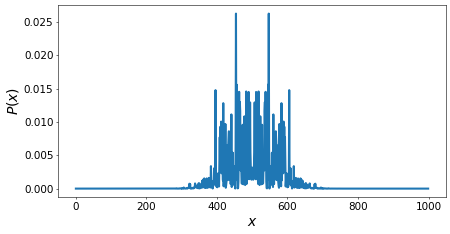

In [26]:
final_state = amp2prob(np.array(states_ra_ut[steps-10]))

final_distribution_plot(final_state, list(range(N)))

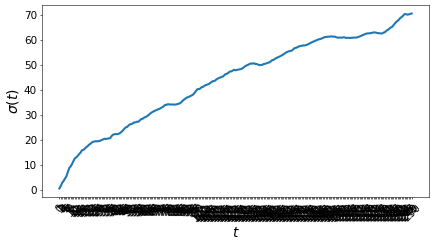

In [30]:
std_plot(states2std([np.array(x) for x in states_ra_ut], range(0, N)), steps)